## <h1><center>Workshop Final: Título del trabajo</center></h1>

<a id="indice"></a> 
## Índice

### <a href='#section_objetivos'>0. Objetivos del Workshop Final</a>


### <a href='#section_introduccion'>1. Actualización y carga de bibliotecas</a>
- #### <a href='#1.1'>1.1 Carga de datos y armado del DataFrame</a>
- #### <a href='#1.2'>1.2 Análisis exploratorio de los datos</a>


### <a href='#2.'>2. Entrenamiento de los modelos de series de tiempo</a>
- #### <a href='#2.1'>2.1 </a>
- #### <a href='#2.2'>2.2 </a>
- #### <a href='#2.3'>2.3 </a>

### <a href='#3.'>3. Cálculo de errores para la evaluación de los modelos</a>
- #### <a href='#3.1'>3.1 </a>
- #### <a href='#3.2'>3.2 </a>

<a id="section_objetivos"></a> 
## 0. Objetivos del Workshop
<a href='#indice'>Volver a TOC</a>

Explicar qué vamos a hacer y por qué queremos hacerlo...

<a id="section_introduccion"></a> 
## 1. Actualización y carga de bibliotecas
<a href='#indice'>Volver a TOC</a>

En primera instancia, se cargarán todas las bibliotecas a utilizar. Algunas de ellas no se encuentran en el ambiente o requieren ser actualizadas, es por ello que dejamos las siguientes líneas comentadas para que se instalen las mismas

In [18]:
#!pip install --upgrade pandas --user

In [19]:
#!pip install --upgrade pandas-datareader --user

In [20]:
#!pip install --upgrade mplfinance --user

En caso que tire error cuando quiera conectarse a la API de yahoo finance (en la función _captura_datos_), recomendamos reiniciar jupyter lab una vez instaladas y actualizadas las librerías, o bien instalarlas directamente desde anaconda promt, mediante las siguientes sintaxis:
- pip install --upgrade pandas
- pip install --upgrade pandas-datareader
- pip install --upgrade mplfinance

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

#import warnings
#warnings.filterwarnings('ignore')

import pandas_datareader.data as web
import datetime
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

import mplfinance as mpf

import statsmodels.api as sm

import plotly.subplots as ms
import plotly.graph_objects as go
import TimeSeriesAnalysis as ts

<a id="1.1"></a> 
## 1.1 Carga de datos y armado del DataFrame
<a href='#indice'>Volver a TOC</a>

Debido a que este trabajo apunta a poder analizar cualquier activo que el usuario quiera elegir y esté disponible en la API, se creó un archivo .py donde allí se alojan funciones creadas para falicitar esto último. La función _captura_datos_ permite elegir el tipo de activo,la fecha de inicio (año, mes día) y el intervalo (día, mes) para poder ser analizado.

In [22]:
data = ts.captura_datos("btc-usd","2015, 1, 1","m")

In [23]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,MA20,MA5,timeIndex
Date,,,,,,,,,
2015-01-01,320.434998,171.509995,320.434998,217.464005,1098811912,217.464005,NaN,NaN,0
2015-02-01,265.610992,212.014999,216.867004,254.263000,711518700,254.263000,NaN,NaN,1
2015-03-01,300.044006,236.514999,254.283005,244.223999,959098300,244.223999,NaN,NaN,2
2015-03-31,261.798004,214.873993,244.223007,236.145004,672338700,236.145004,NaN,NaN,3
2015-04-30,247.804001,228.572998,235.938995,230.190002,568122600,230.190002,NaN,236.457202,4


In [24]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close,MA20,MA5,timeIndex
count,83.000000,83.000000,83.000000,83.000000,8.300000e+01,83.000000,64.000000,79.000000,83.000000
mean,12458.677532,8701.745285,10145.470892,10811.452974,4.252908e+11,10811.452974,7814.954268,10015.912569,41.000000
std,17331.153384,12444.644401,14491.457023,15279.498616,5.579113e+11,15279.498616,7406.854274,13447.303184,24.103942
min,247.804001,171.509995,216.867004,217.464005,5.681226e+08,217.464005,369.728247,236.457202,0.000000
25%,738.319489,610.656494,648.558502,687.154480,3.070203e+09,687.154480,2705.556972,758.615686,20.500000
50%,7388.430176,5347.645996,6411.680176,6438.644531,1.583595e+11,6438.644531,6878.089001,6833.037988,41.000000
75%,12012.790527,8976.270508,10138.020996,10227.349609,6.766679e+11,10227.349609,7841.516281,9542.871777,61.500000
max,64863.097656,54477.972656,58926.562500,58918.832031,2.267153e+12,58918.832031,31802.415820,49059.085156,82.000000


<a id="1.2"></a> 
## 1.2 Análisis exploratorio de los datos
<a href='#indice'>Volver a TOC</a>

Luego, se creó la función _graficar_datos_ con el fin de poder visualizar las carácterística de la serie de tiempo (tendencia,estacionalidad,ciclos y aleatoriedad) con el fin de junto otras visualizaciones (histogramas, boxplots) poder tener un pequeño análisis estadístico descriptivo de tipo de activo elegido

<Figure size 432x288 with 0 Axes>

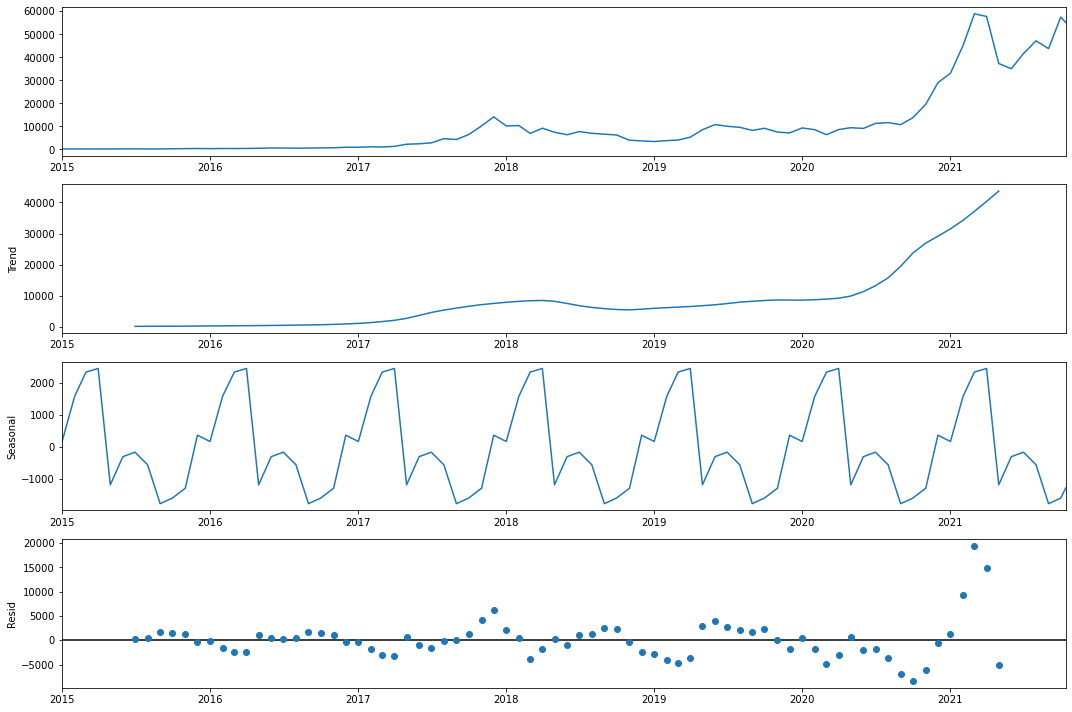

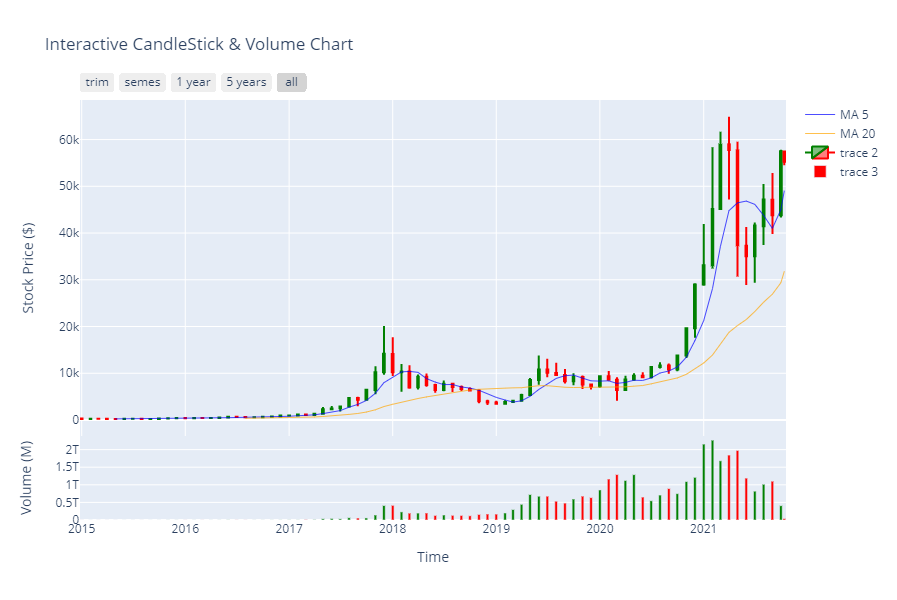

In [25]:
ts.graficar_datos(data)

## Acá yo agregaría histogramas. Después podría estar bueno analizar si el activo que se eligió tiene valores faltantes y eso, y usar algunas funciones que tenía statmodels como para predecir esos valores y bla bla

<a id="2."></a> 
## 2. Entrenamiento de los modelos de series de tiempo
<a href='#indice'>Volver a TOC</a>

Ahora pasamos a seleccionar el modleo con el cual queremos predecir el activo elegido. Para eso, usamos la funcíón _evaluación_ cuyos parámetros son:
- df: DataFrame elegido
- pred_size: Tamaño del dataframe de test
- lags: cantidad de muestras para la ventana temporal del ACF y PACF
- model: Modelo a elegir, los cuales son:
    - linear
    - quad
    - log
- estacionalidad: Es un booleano (True o False) para elegir si se quiere modelar con estacionalidad o no.

El modelo elegido linear_est posee un p= 0.016260663542859353
El modelo elegido quad_est posee un p= 0.01630809248702762
El modelo elegido log_est posee un p= 4.938792509953534e-08
El modelo elegido linear posee un p= 0.010134903035771498
El modelo elegido quad posee un p= 0.021601395295160825
la serie no es estacionaria, hacer mas diferenciación


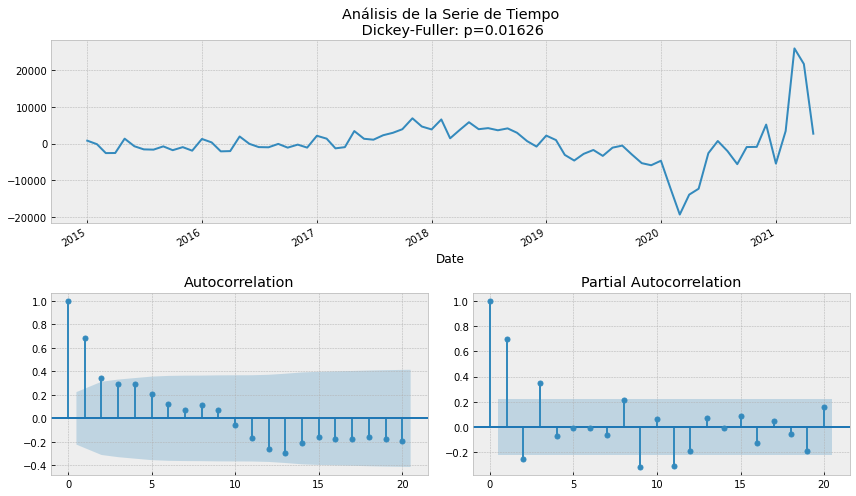

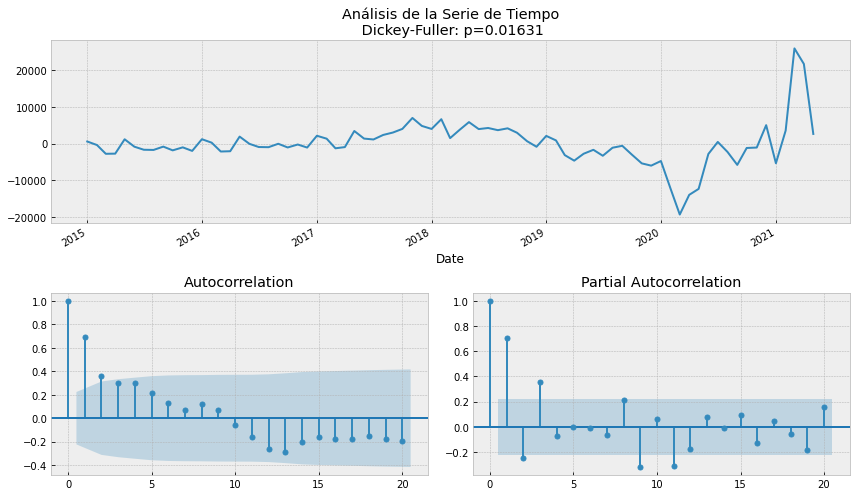

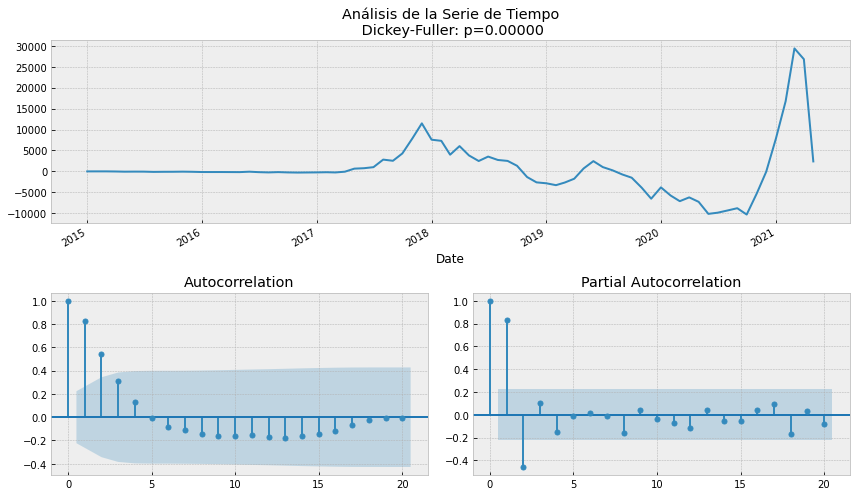

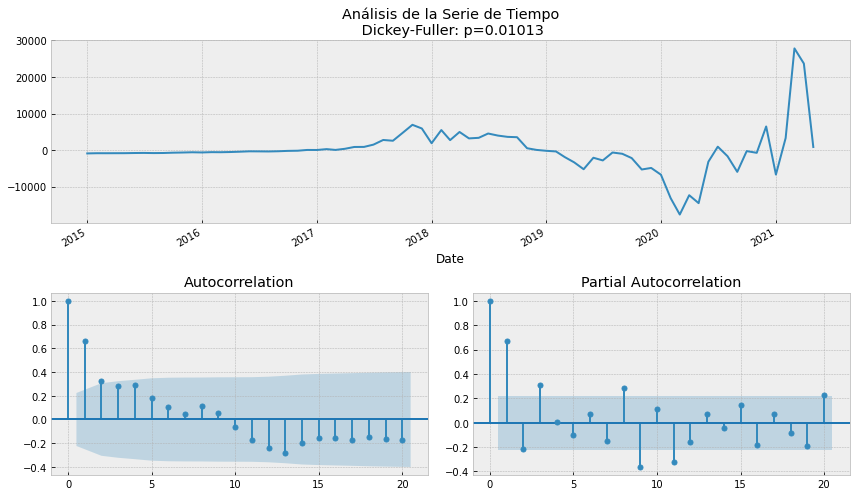

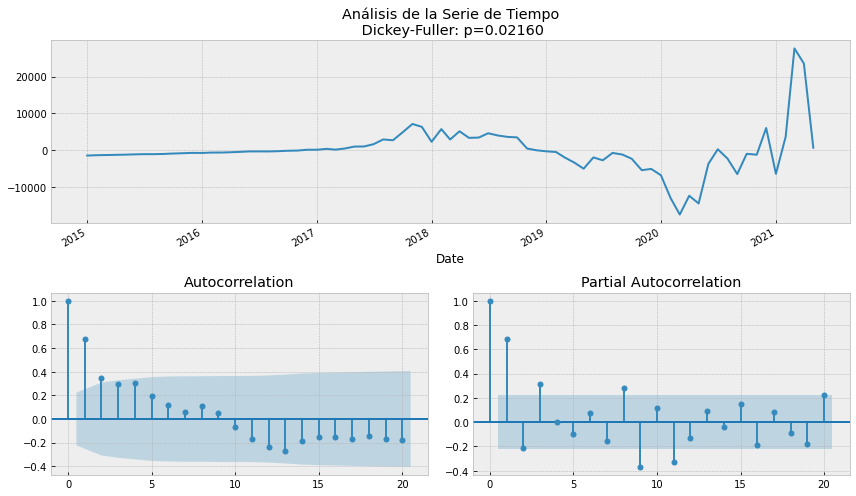

In [26]:
models = ['linear','quad','log']
est = [True, False]
model = {}
for j in est:
    for i in models:
        modelo = ts.evaluacion(data,6,20,model=i,estacionalidad=j)
        if j:
            model[str(i)+'_est']=modelo
        else:
            model[str(i)]=modelo

Luego de esto, modelamos lo faltante mediante el modelo ARIMA

In [27]:
p_list = []
q_list = []
for j in est:
    if j:
        for i in models:
            try:
                RMSE, p, q, model_label = ts.eval_models_hyperparameters(model[str(i)+'_est'],numbers=5,model_label=str(i)+'_est',alpha=0.05)
                df = pd.DataFrame([RMSE, p, q]).T.rename(columns={0:'RMSE',1:'p',2:'q'})
                df['model'] = model_label
                df_index = df.RMSE.idxmin() 
                fila_min = df.iloc[df_index]
                p = int(fila_min.p)
                q = int(fila_min.q)
                p_val,q_val = ts.arima(model[str(i)+'_est'], p=p, d=0, q=q, alpha=0.05)
                p_list.append(p_val)
                q_list.append(q_val)
            except:
                continue
        else:
            for i in models:
                try:
                    RMSE, p, q, model_label = ts.eval_models_hyperparameters(model[str(i)],numbers=5,model_label=str(i),alpha=0.05)
                    df = pd.DataFrame([RMSE, p, q]).T.rename(columns={0:'RMSE',1:'p',2:'q'})
                    df['model'] = model_label
                    df_index = df.RMSE.idxmin() 
                    fila_min = df.iloc[df_index]
                    p = int(fila_min.p)
                    q = int(fila_min.q)
                    p_val, q_val = ts.arima(model[str(i)],p=p,d=0,q=q,alpha=0.05)
                    p_list.append(p_val)
                    q_list.append(q_val)
                except:
                    continue

#ts.arima(modelo,2,0,2,0.05)
#model.keys()

In [28]:
#print(df.tail(6))
#df_index = df.RMSE.idxmin() 
#df_index

<a id="3."></a> 
## 3. Cálculo de errores para la evaluación de los modelos
<a href='#indice'>Volver a TOC</a>

In [29]:
dic = {}
dicc = {}
for j in est:
    if j:
        for i in models:
            try:
                df_train = model[str(i)+'_est'][1]
                df_test = model[str(i)+'_est'][2]
                dic['RMSE_train'] = ts.RMSE(df_train.model_ARIMA,df_train.Close)
                dic['RMSE_test'] = ts.RMSE(df_test.model_ARIMA,df_test.Close)
                dic['model'] = str(i) + '_est'
                lista = list(dic.values())
                dicc[str(i)+'_est'] = lista
            except:
                continue
        else:
            for i in models:
                try:
                    df_train = model[str(i)][1]
                    df_test = model[str(i)][2]
                    dic['RMSE_train'] = ts.RMSE(df_train.model_ARIMA,df_train.Close)
                    dic['RMSE_test'] = ts.RMSE(df_test.model_ARIMA,df_test.Close)
                    dic['model'] = str(i)
                    lista = list(dic.values())
                    dicc[str(i)] = lista
                except:
                    continue

df_eval = pd.DataFrame(dicc).T.rename(columns={0:'RMSE_train',1:'RMSE_test',2:'model'}).reset_index(drop=True)
df_eval['p'] = p_list
df_eval['q'] = q_list

In [30]:
df_eval

,RMSE_train,RMSE_test,model,p,q
0,3784.381095,31340.18638,linear_est,4,1
1,3755.154346,30777.660676,quad_est,4,1
2,3096.318653,5746.815875,log_est,1,1
3,3855.090001,27206.906189,linear,4,3
4,3766.210029,25678.554856,quad,4,3


## DataFrame para gráficos

In [31]:
df_train_graf, df_test_graf = ts.dataframe_to_graph(model)

In [32]:
df_train_graf

,Close,linear_est,quad_est,log_est,linear,quad,log
2015-01-01,217.464005,157.186249,325.081001,475.801174,2071.415481,2760.733078,NaN
2015-02-01,254.263000,1204.662480,1246.173432,293.034739,526.356281,558.995433,NaN
2015-03-01,244.223999,2812.961384,2823.642429,305.077326,602.300049,650.163762,NaN
2015-03-31,236.145004,1032.157957,1023.494123,307.224629,468.507052,463.122216,NaN
2015-04-30,230.190002,-1881.605533,-1881.070656,322.005453,478.321446,461.162280,NaN
...,...,...,...,...,...,...,...
2021-01-01,33114.359375,42639.249991,42399.824002,25830.599303,41409.825392,40989.354278,NaN
2021-02-01,45137.769531,34453.827941,34354.446771,38424.979997,37727.728331,37130.530035,NaN
2021-03-01,58918.832031,40289.789759,40428.589826,45345.139242,37938.889652,38404.152753,NaN
2021-03-31,57750.175781,57323.939220,57375.352603,59746.670171,54158.447399,54987.818608,NaN


In [33]:
df_test_graf

,Close,linear_est,quad_est,log_est,linear,quad,log
2021-05-31,35040.835938,24469.506767,24676.554326,33456.149863,28953.742145,29492.054262,NaN
2021-06-30,41626.195312,26295.922495,26731.735099,41701.532385,37714.065454,38822.677853,NaN
2021-07-31,47166.687500,30364.283021,30847.235276,42835.336164,35907.764247,37394.428801,NaN
2021-08-31,43790.894531,24343.847965,24817.867614,41440.819551,16364.808035,17980.017433,NaN
2021-09-30,57484.789062,11246.378493,11914.650286,56556.488116,10178.687637,12162.866362,NaN
2021-10-12,55226.859375,2805.733857,3735.255376,68284.165802,19560.121507,22031.900501,NaN
